# Monthly Stack Overflow Questions analysis

## Introduction
This project analyzes the trends and popularity of various programming languages on Stack Overflow from 2008 to 2024, exploring the impact of AI tools like ChatGPT on developer query behavior.

In [127]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [128]:
# read file
df = pd.read_csv('TotalQuestions.csv')

In [129]:
df.head()

,Month,C++,C#,TypeScript,PHP,Swift,Ruby,Go,SQL,Kotlin,...,Shell,C,HTML,Objective-C,Perl,Matlab,R,Python,Java,Javascript
0,2008-09-01,755,1639,0,474,0,286,0,503,0,...,65,320,328,50,130,11,6,537,634,1129
1,2008-11-01,734,1729,0,499,0,157,0,413,0,...,51,258,327,106,97,11,1,448,580,954
2,2008-12-01,630,1594,0,476,0,159,0,424,0,...,51,188,309,123,133,13,1,437,625,825
3,2009-01-01,848,2374,0,628,1,205,0,585,0,...,47,318,414,143,146,19,8,631,790,1147
4,2009-02-01,841,2597,0,757,1,286,0,668,0,...,75,331,480,209,163,27,8,630,945,1202


In [130]:
df.shape

(185, 21)

In [131]:
df.dtypes

Month          object
C++             int64
C#              int64
TypeScript      int64
PHP             int64
Swift           int64
Ruby            int64
Go              int64
SQL             int64
Kotlin          int64
Scala           int64
Shell           int64
C               int64
HTML            int64
Objective-C     int64
Perl            int64
Matlab          int64
R               int64
Python          int64
Java            int64
Javascript      int64
dtype: object

In [132]:
df.duplicated().sum()

0

In [133]:
df.isna().sum()

Month          0
C++            0
C#             0
TypeScript     0
PHP            0
Swift          0
Ruby           0
Go             0
SQL            0
Kotlin         0
Scala          0
Shell          0
C              0
HTML           0
Objective-C    0
Perl           0
Matlab         0
R              0
Python         0
Java           0
Javascript     0
dtype: int64

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        185 non-null    object
 1   C++          185 non-null    int64 
 2   C#           185 non-null    int64 
 3   TypeScript   185 non-null    int64 
 4   PHP          185 non-null    int64 
 5   Swift        185 non-null    int64 
 6   Ruby         185 non-null    int64 
 7   Go           185 non-null    int64 
 8   SQL          185 non-null    int64 
 9   Kotlin       185 non-null    int64 
 10  Scala        185 non-null    int64 
 11  Shell        185 non-null    int64 
 12  C            185 non-null    int64 
 13  HTML         185 non-null    int64 
 14  Objective-C  185 non-null    int64 
 15  Perl         185 non-null    int64 
 16  Matlab       185 non-null    int64 
 17  R            185 non-null    int64 
 18  Python       185 non-null    int64 
 19  Java         185 non-null    

In [135]:
df.describe()

,C++,C#,TypeScript,PHP,Swift,Ruby,Go,SQL,Kotlin,Scala,Shell,C,HTML,Objective-C,Perl,Matlab,R,Python,Java,Javascript
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,4348.227027,8703.324324,1233.789189,7907.702703,1798.989189,1235.778378,391.697297,3617.135135,510.427027,606.870270,499.448649,2177.129730,6408.102703,1579.600000,367.027027,512.762162,2724.318919,11810.405405,13644.648649,10344.205405
std,1817.393817,3598.207945,1181.274617,4714.384706,1690.731704,812.326336,266.670851,1561.373270,580.067215,378.839051,244.911871,930.701439,3380.513648,1534.498984,237.822583,389.430838,1680.130436,7064.069588,6604.216361,5320.593364
min,630.000000,1594.000000,0.000000,474.000000,0.000000,134.000000,0.000000,413.000000,0.000000,3.000000,47.000000,188.000000,309.000000,37.000000,34.000000,11.000000,1.000000,437.000000,580.000000,825.000000
25%,3128.000000,5491.000000,1.000000,3629.000000,5.000000,492.000000,76.000000,2581.000000,2.000000,285.000000,311.000000,1562.000000,4043.000000,211.000000,161.000000,179.000000,1088.000000,5718.000000,8263.000000,5667.000000
50%,4319.000000,8728.000000,1107.000000,7601.000000,1530.000000,940.000000,468.000000,3941.000000,103.000000,563.000000,503.000000,2188.000000,6345.000000,886.000000,301.000000,398.000000,3300.000000,11766.000000,15182.000000,10698.000000
75%,5867.000000,11837.000000,2402.000000,12443.000000,3136.000000,2028.000000,625.000000,4596.000000,1119.000000,883.000000,712.000000,2792.000000,9788.000000,3218.000000,561.000000,844.000000,4134.000000,17720.000000,18842.000000,14649.000000
max,8649.000000,16117.000000,3295.000000,18203.000000,5143.000000,2945.000000,795.000000,7756.000000,1624.000000,1339.000000,951.000000,4548.000000,13212.000000,5001.000000,952.000000,1516.000000,6166.000000,29378.000000,24077.000000,21889.000000


In [136]:
df.rename(columns={'Month': 'Date'}, inplace=True)

In [137]:
df.columns

Index(['Date', 'C++', 'C#', 'TypeScript', 'PHP', 'Swift', 'Ruby', 'Go', 'SQL',
       'Kotlin', 'Scala', 'Shell', 'C', 'HTML', 'Objective-C', 'Perl',
       'Matlab', 'R', 'Python', 'Java', 'Javascript'],
      dtype='object')

In [138]:
df['Date'] = pd.to_datetime(df['Date'])

In [139]:
df.dtypes

Date           datetime64[ns]
C++                     int64
C#                      int64
TypeScript              int64
PHP                     int64
Swift                   int64
Ruby                    int64
Go                      int64
SQL                     int64
Kotlin                  int64
Scala                   int64
Shell                   int64
C                       int64
HTML                    int64
Objective-C             int64
Perl                    int64
Matlab                  int64
R                       int64
Python                  int64
Java                    int64
Javascript              int64
dtype: object

In [140]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

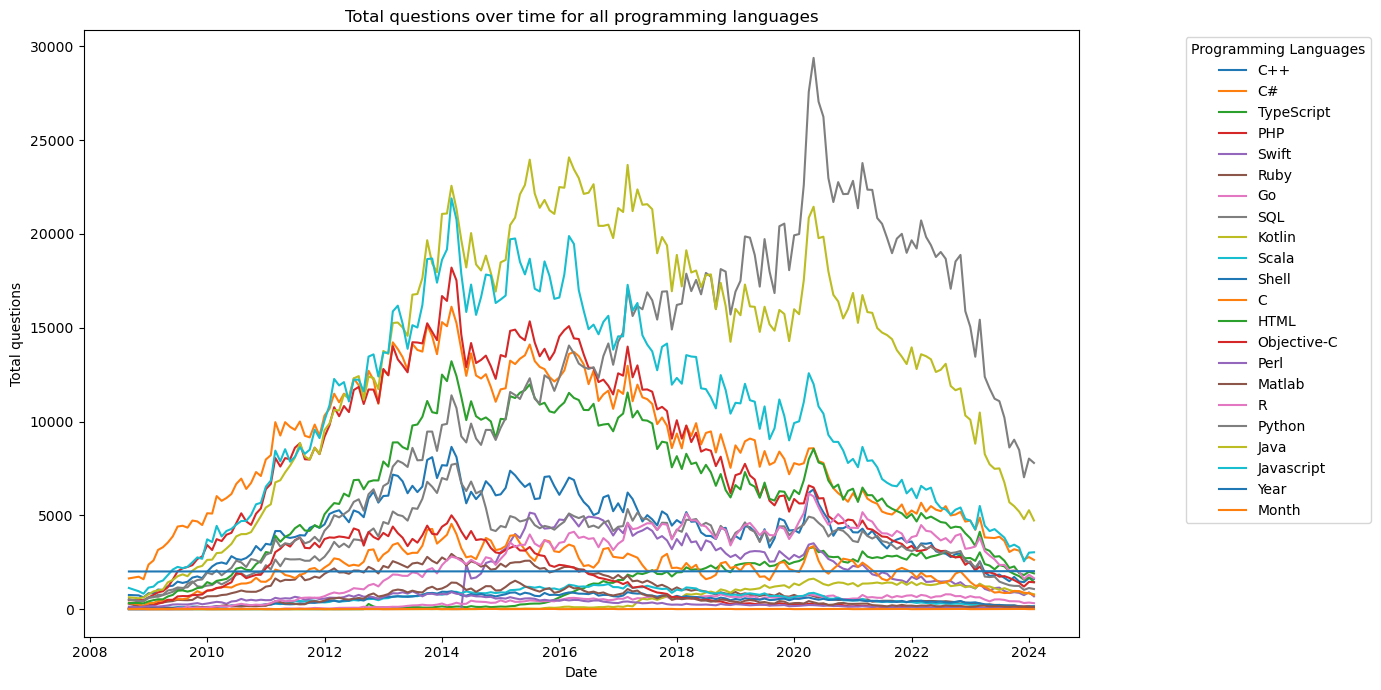

In [191]:
plt.figure(figsize=(14, 7))
for column in df.columns[1:]:
    sns.lineplot(data=df, x='Date', y=column, label=column)
plt.title('Total questions over time for all programming languages')
plt.xlabel('Date')
plt.ylabel('Total questions')
plt.legend(title='Programming Languages', bbox_to_anchor=(1.1, 1), loc='upper left')
plt.tight_layout()
plt.show()

We can discover from the plot that there is a significant decrease in questions related to programming languages on StackOverflow from mid 2020 to 2024.
It might be realted to the emergence of ChatGpt and similar tools.

In [142]:

before_chatgpt = after_chatgpt = 0
for column in df.columns[1:]:
    before_chatgpt += df[df['Date'] < '2020-06-01'][column]
    after_chatgpt += df[df['Date'] >= '2020-06-01'][column]
mean_before = np.mean(before_chatgpt)
mean_after = np.mean(after_chatgpt)
t_stat, p_value = stats.ttest_ind(before_chatgpt, after_chatgpt)
print(f'mean before: {mean_before} \nmean after: {mean_after}')
print(f"T statistic: {t_stat}\np value: {p_value}")

mean before: 84442.09285714285 
mean after: 67913.35555555555
T statistic: 2.873262025085126
p value: 0.0045431273878108434


After calculating the T statistic, which indicates a significant difference between the means of question counts before and after mid 2020, and considering the p-value of less than 0.05, we conclude that the decrease in average question counts after mid 2020 is statistically significant. This suggests that the increased use of ChatGPT or similar tools may have contributed to the observed decline in questions related to programming languages on Stack Overflow.

In [143]:
total_questions_per_lang = df.drop(columns=['Date']).sum()
total_questions_per_lang

C++             804422
C#             1610115
TypeScript      228251
PHP            1462925
Swift           332813
Ruby            228619
Go               72464
SQL             669170
Kotlin           94429
Scala           112271
Shell            92398
C               402769
HTML           1185499
Objective-C     292226
Perl             67900
Matlab           94861
R               503999
Python         2184925
Java           2524260
Javascript     1913678
dtype: int64

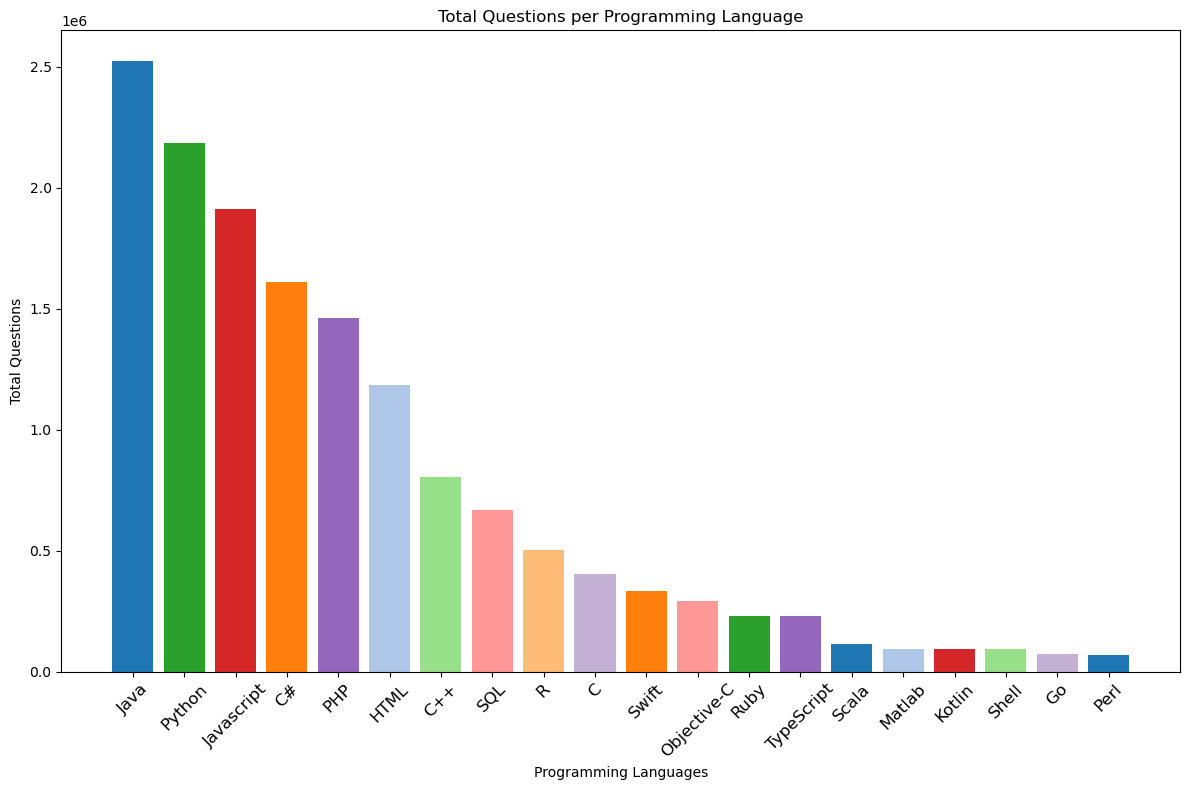

In [144]:
# total_questions_per_lang = total_questions_per_lang.drop('total_questions_per_lang')
plt.figure(figsize=(12, 8))
colors = ['#1f77b4', '#2ca02c', '#d62728', '#ff7f0e', '#9467bd',
          '#aec7e8', '#98df8a', '#ff9896', '#ffbb78', '#c5b0d5',
          '#ff7f0e', '#ff9896', '#2ca02c', '#9467bd', '#1f77b4',
          '#aec7e8', '#d62728', '#98df8a', '#c5b0d5']
total_questions_per_lang = total_questions_per_lang.sort_values(ascending=False)
plt.bar(total_questions_per_lang.index, total_questions_per_lang, color=colors)
plt.title('Total Questions per Programming Language')
plt.xlabel('Programming Languages')
plt.ylabel('Total Questions')
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

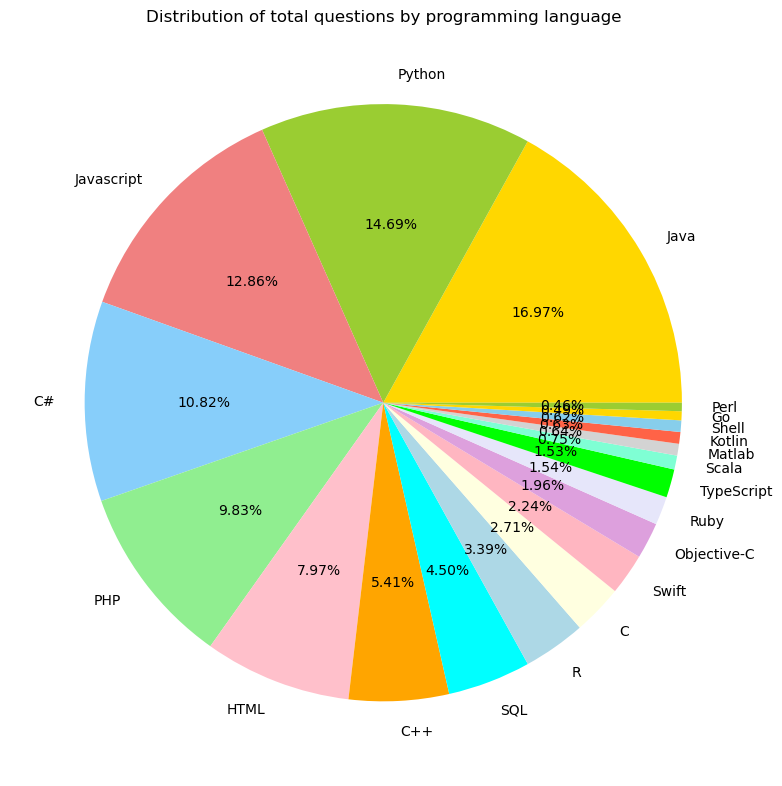

In [145]:
plt.figure(figsize=(8, 8))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen',
          'pink', 'orange', 'cyan', 'lightblue', 'lightyellow',
          'lightpink', 'plum', 'lavender', 'lime', 'aquamarine',
          'lightgrey', 'tomato', 'skyblue']
plt.pie(total_questions_per_lang, labels=total_questions_per_lang.index, autopct='%1.2f%%', colors=colors)
plt.title('Distribution of total questions by programming language')
plt.tight_layout()
plt.show()

In [146]:
df['Year'] = df['Date'].dt.year
df.head()

,Date,C++,C#,TypeScript,PHP,Swift,Ruby,Go,SQL,Kotlin,...,C,HTML,Objective-C,Perl,Matlab,R,Python,Java,Javascript,Year
0,2008-09-01,755,1639,0,474,0,286,0,503,0,...,320,328,50,130,11,6,537,634,1129,2008
1,2008-11-01,734,1729,0,499,0,157,0,413,0,...,258,327,106,97,11,1,448,580,954,2008
2,2008-12-01,630,1594,0,476,0,159,0,424,0,...,188,309,123,133,13,1,437,625,825,2008
3,2009-01-01,848,2374,0,628,1,205,0,585,0,...,318,414,143,146,19,8,631,790,1147,2009
4,2009-02-01,841,2597,0,757,1,286,0,668,0,...,331,480,209,163,27,8,630,945,1202,2009


In [153]:
df2 = df.copy()
df_grouped = df2.drop(columns=['Date']).groupby('Year').sum()
df_grouped.head()

,C++,C#,TypeScript,PHP,Swift,Ruby,Go,SQL,Kotlin,Scala,Shell,C,HTML,Objective-C,Perl,Matlab,R,Python,Java,Javascript
Year,,,,,,,,,,,,,,,,,,,,
2008,2119,4962,0,1449,0,602,0,1340,0,14,167,766,964,279,360,35,8,1422,1839,2908
2009,15617,45931,1,20241,16,5188,76,11786,0,616,1135,6732,9574,6347,2667,597,521,12843,18719,23867
2010,31874,75236,0,51275,18,10154,149,19601,4,2074,2123,15230,22787,17870,5001,1811,2260,26962,43455,54235
2011,47727,112113,1,95033,58,18642,360,30621,13,4314,3540,22537,47367,38530,6726,3898,5822,41971,89500,98308
2012,62805,137625,501,130200,67,24241,919,42906,19,5516,5846,30851,74533,46431,7718,7201,12160,63947,135595,143772


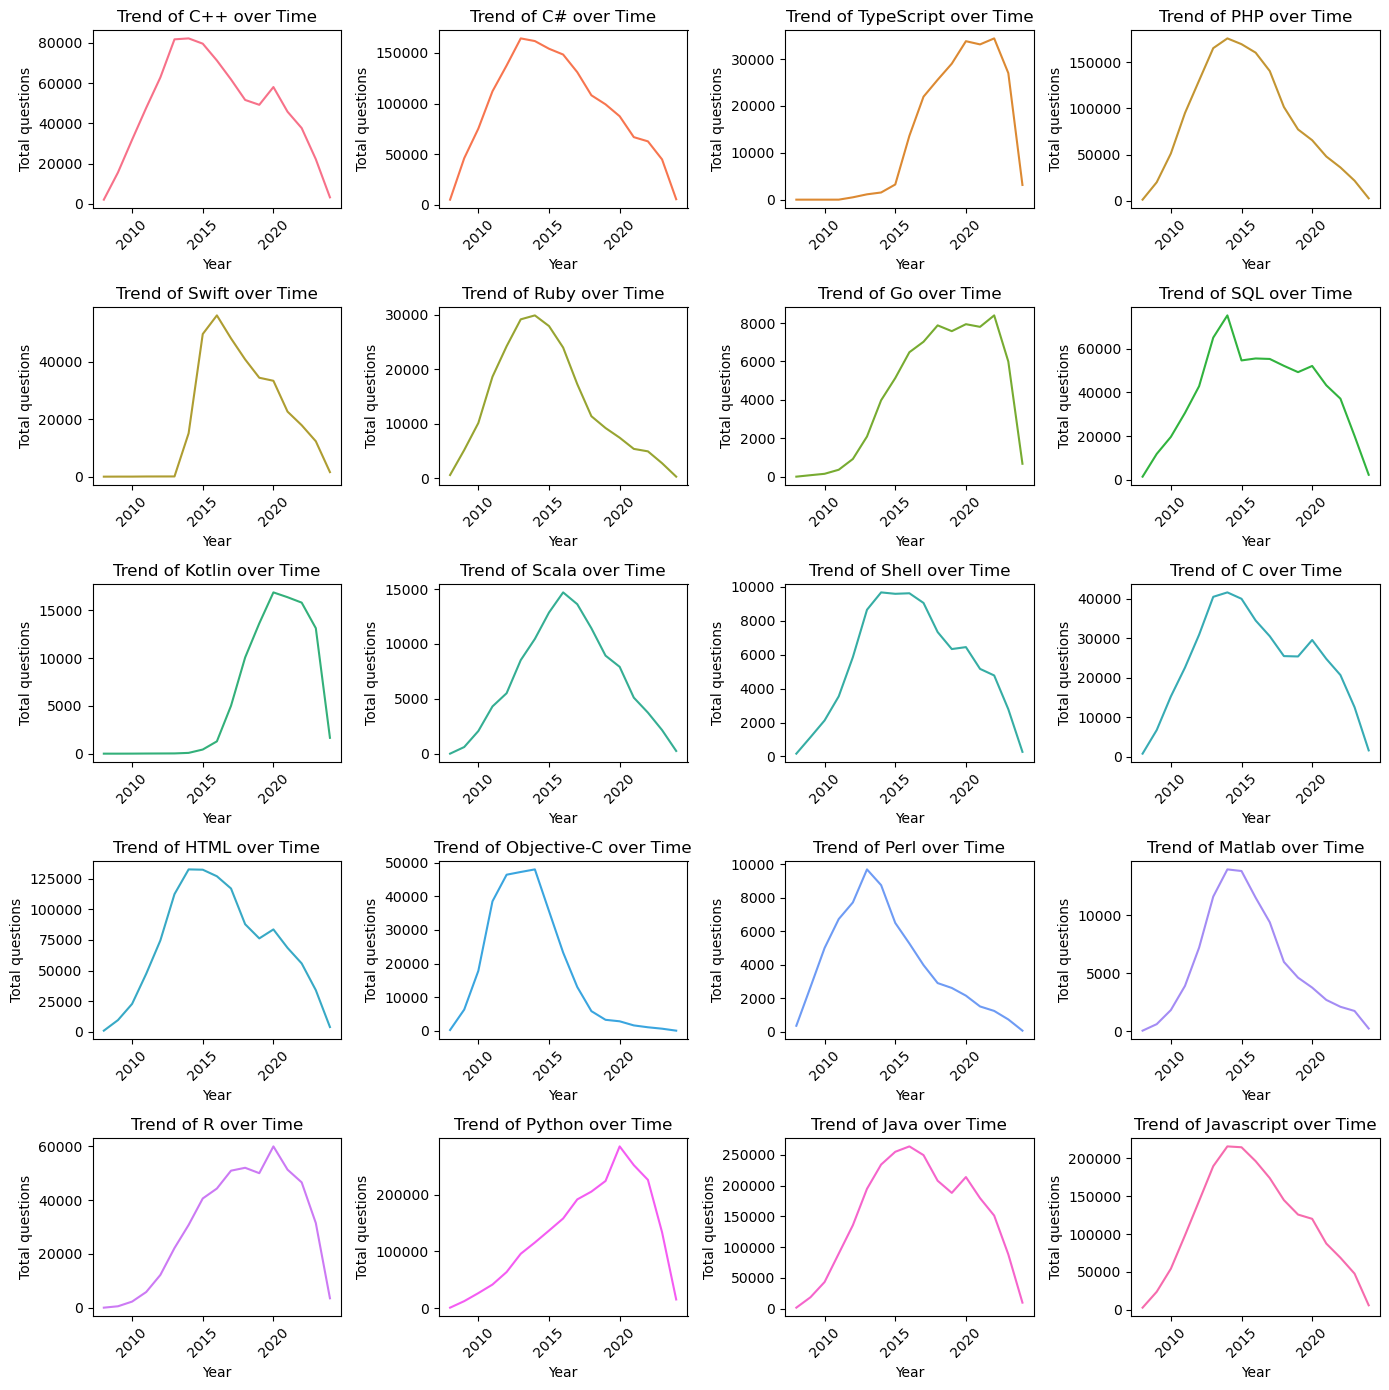

In [189]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(14,14))
axes = axes.flatten()
langs = df_grouped.columns
colors= sns.color_palette('husl', len(langs))
for i, lang in enumerate(langs):
    if i < len(langs):
        sns.lineplot(x=df_grouped.index, y=lang, data=df_grouped, ax=axes[i], color=colors[i])
        axes[i].set_title(f'Trend of {lang} over Time')
        axes[i].set_ylabel('Total questions')
        axes[i].set_xlabel('Year')
        axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

- We discover from this plot that Some languages, such as Python and JavaScript, have shown a consistent increase in the number of questions asked over the years.
- Other languages, such as PHP and Ruby, have shown a decline in the number of questions over time.
- The period from 2022 to 2024 shows a noticeable decrease in questions across most languages, potentially indicating the impact of AI tools like ChatGPT.

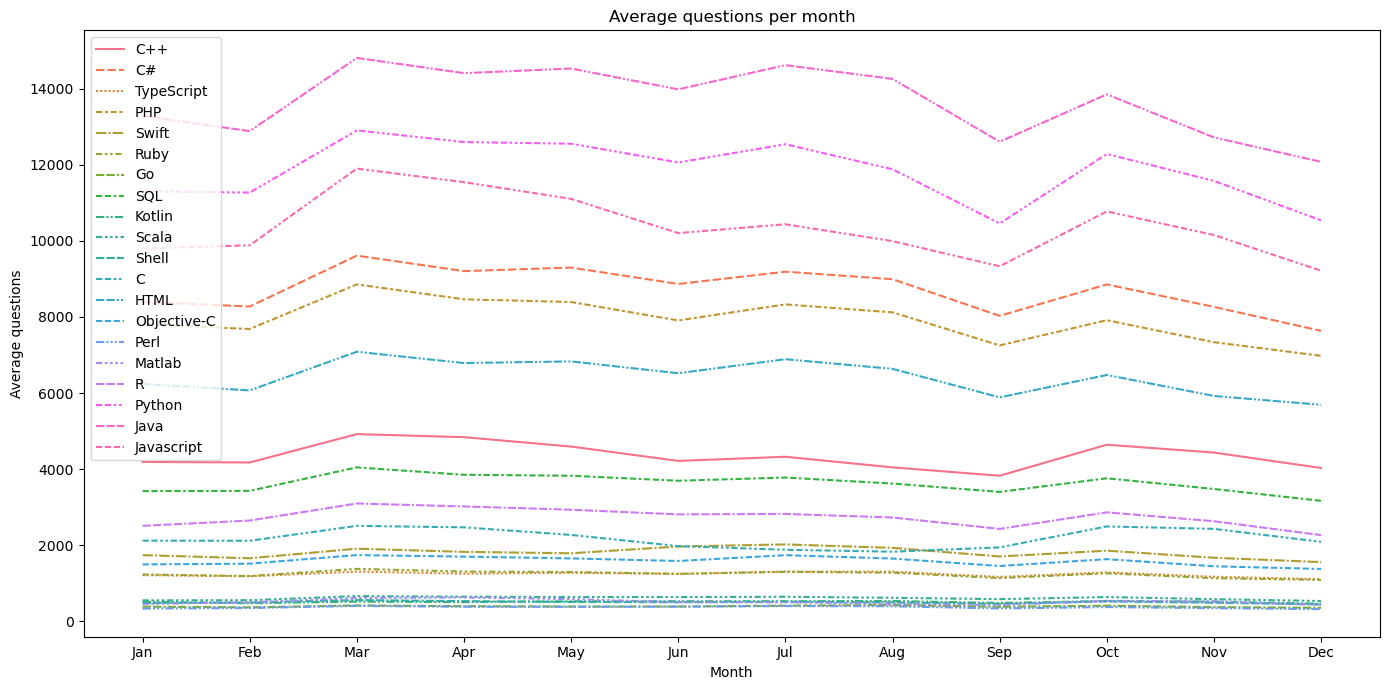

In [192]:
plt.figure(figsize=(14, 7))
monthly_avg = df.drop(columns=['Year']).groupby('Month').mean()
sns.lineplot(data=monthly_avg)
plt.title('Average questions per month')
plt.xlabel('Month')
plt.ylabel('Average questions')
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

- We discover from this plot that Certain months, such as March show higher average question counts compared to others.
- This pattern could be due to the start of new projects or academic terms.